In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Define paths to your dataset directories
train_dir = '/kaggle/input/iris-data/Retinal fundus images for DR/1.train'  # Replace with the actual path to your training data
val_dir = '/kaggle/input/iris-data/Retinal fundus images for DR/2.val'  # Replace with the actual path to your validation data

# Image parameters
img_height = 64  # Image height
img_width = 64   # Image width
batch_size = 32

# Set up ImageDataGenerators to load and preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'categorical' if one-hot encoded
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'categorical' if one-hot encoded
)


Found 638 images belonging to 7 classes.
Found 136 images belonging to 7 classes.


In [19]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # For a 7-class problem (adjust based on your dataset)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if one-hot encoding
              metrics=['accuracy'])



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1937 - loss: 1.8991 - val_accuracy: 0.3235 - val_loss: 1.7440
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4033 - loss: 1.7272 - val_accuracy: 0.4706 - val_loss: 1.5513
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4996 - loss: 1.4644 - val_accuracy: 0.5294 - val_loss: 1.3659
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4891 - loss: 1.4089 - val_accuracy: 0.5221 - val_loss: 1.3151
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5245 - loss: 1.2549 - val_accuracy: 0.5588 - val_loss: 1.2135
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6083 - loss: 1.0894 - val_accuracy: 0.5662 - val_loss: 1.2631
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5975 - loss: 1.0765 - val_accuracy: 0.5809 - val_loss: 1.1915
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6627 - loss: 0.9789 - val_accuracy: 0.5735 - val_loss: 1.2018
Epo

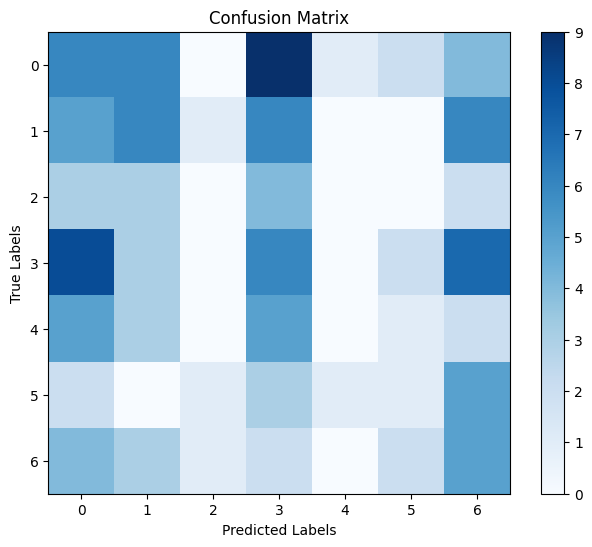

Learning Rate: 0.001
Training Rate: 0.6739811897277832


In [20]:
# Train the model using data generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model using validation data
y_pred = np.argmax(model.predict(val_generator), axis=-1)
y_true = val_generator.classes  # True labels from the validation generator

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Sensitivity (Recall for each class)
sensitivity = recall_score(y_true, y_pred, average=None)

# Specificity (1 - False Positive Rate for each class)
specificity = 1 - (conf_matrix.sum(axis=0) - np.diagonal(conf_matrix)) / conf_matrix.sum(axis=0)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity (per class): {sensitivity}")
print(f"Specificity (per class): {specificity}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(train_generator.num_classes), np.arange(train_generator.num_classes))
plt.yticks(np.arange(train_generator.num_classes), np.arange(train_generator.num_classes))
plt.show()

# Learning rate and training rate
learning_rate = 0.001  # The learning rate you defined in the optimizer
training_rate = history.history['accuracy'][-1]  # Last epoch training accuracy
print(f"Learning Rate: {learning_rate}")
print(f"Training Rate: {training_rate}")
